# EDA -LOAN DataSet Case Study

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import pandas as pd, numpy as np
import datetime
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
#Read loan csv file
loan=pd.read_csv('loan.csv', encoding='latin')
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#check for null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#check for 100% null values
columns=loan.columns
percent_missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing_value_df=pd.DataFrame({'column_name':columns,'percent_missing':percent_missing})
missing_drop=list(missing_value_df[missing_value_df.percent_missing==100.00].column_name)
loan=loan.drop(missing_drop, axis=1)
loan.shape

(39717, 57)

In [8]:
# Remove unwanted columns
loan=loan.drop(['title','desc','url','emp_title','zip_code'], axis=1)

In [9]:
loan=loan.drop(['last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','recoveries',
               'total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv','out_prncp',
               'out_prncp_inv'], axis=1)

In [10]:
loan=loan.drop(['delinq_2yrs','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','collections_12_mths_ex_med',
               'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','installment','mths_since_last_delinq',
                'mths_since_last_record','revol_bal','revol_util','total_pymnt','next_pymnt_d','initial_list_status',
               'pub_rec_bankruptcies','policy_code','application_type','pymnt_plan','open_acc'], axis=1)

In [11]:
loan.shape

(39717, 18)

In [12]:
#check for applicate value by checking if the loan is repeated
true_count=loan['id'].duplicated().sum()
print(true_count)

0


In [13]:
#remove loan id and member id
loan=loan.drop(['id','member_id'],axis=1)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [14]:
loan=loan[loan.loan_status!='Current']

In [15]:
#check how many rows are null
round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

In [16]:
# remove the null value from emp_length
loan=loan.dropna(subset=['emp_length'])

In [17]:
#check the type of purpose
(loan.purpose.value_counts()*100)/len(loan)

purpose
debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: count, dtype: float64

In [18]:
# since we dont know what the term other  stands for 
loan.drop(loan[loan.purpose=='other'].index, inplace=True)

In [19]:
#convert the term column to int by removing the word month
loan['term']=loan['term'].str.replace('months','')

loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96%,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [20]:
loan['term']=loan['term'].str.replace('s','')
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96%,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [21]:
loan['term']=loan['term'].astype(int)

In [22]:
#remove the % char in int rate and convert it to data type float
loan['int_rate']=loan['int_rate'].str.replace('%','')
loan['int_rate']=loan['int_rate'].astype(float)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [23]:
#clean the emp_length column
loan['emp_length']=loan['emp_length'].str.replace('years','')
loan['emp_length']=loan['emp_length'].str.replace('< 1 year','0')
loan['emp_length']=loan['emp_length'].str.strip('+ ')
loan['emp_length']=loan['emp_length'].str.replace('year','')
loan['emp_length']=loan['emp_length'].astype(int)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [24]:
#check the data spread in the annual_inc column
loan['annual_inc'].describe()

count    3.383100e+04
mean     7.003334e+04
std      6.596019e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [25]:
nn_quartile=loan['annual_inc'].quantile(0.99)
loan=loan[loan['annual_inc']< nn_quartile]
loan['annual_inc'].describe()

count     33492.000000
mean      66490.324304
std       35165.906151
min        4000.000000
25%       42000.000000
50%       60000.000000
75%       82000.000000
max      235000.000000
Name: annual_inc, dtype: float64

## Derived Metrics

In [26]:
#creating new column for loan to income ratio
loan['loan_inc_ratio']=100*(loan['loan_amnt']/loan['annual_inc'])
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,loan_inc_ratio
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,20.833333
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,8.333333
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,19.588639
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,13.888889
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,14.892350


In [27]:
loan['loan_inc_ratio'].quantile([.25,.5,.75])

0.25    10.285714
0.50    16.666667
0.75    25.384615
Name: loan_inc_ratio, dtype: float64

In [28]:
#categorised the loan_inc_ratio column to categorised_loan_inc_ratio column
def loan_inc_ratio_category(n):
    if n<10:
        return 'Low'
    elif n>10 and n<17:
        return 'Medium'
    elif n>17 and n<25:
        return 'High'
    else:
        return 'Very High'
loan['categorised_loan_inc_ratio']=loan['loan_inc_ratio'].apply(loan_inc_ratio_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,loan_inc_ratio,categorised_loan_inc_ratio
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,20.833333,High
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,8.333333,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,19.588639,High
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,13.888889,Medium
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,14.892350,Medium


In [29]:
loan['int_rate'].quantile([.25,.5,.75])

0.25     8.94
0.50    11.83
0.75    14.46
Name: int_rate, dtype: float64

In [30]:
def interest_rates(n):
    if n<9:
        return 'Low'
    elif n>=9 and n<12:
        return 'Medium'
    elif n>=12 and n<14:
        return 'High'
    else:
        return 'Very High'
loan['categorised_int_rate_perc']=loan['int_rate'].apply(interest_rates)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,20.833333,High,Medium
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,8.333333,Low,Very High
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,19.588639,High,Very High
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,13.888889,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,14.892350,Medium,Very High


In [31]:
loan['emp_length'].quantile([.25,.5,.75])

0.25    2.0
0.50    4.0
0.75    9.0
Name: emp_length, dtype: float64

In [32]:
def emp_length_category(n):
    if n<2:
        return 'Entry Level'
    elif n>=2 and n<4:
        return 'Junior Level'
    elif n>=4 and n<9:
        return 'Middle Level'
    else:
        return 'Senior Level'
loan['categorised_emp_length']=loan['emp_length'].apply(emp_length_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,20.833333,High,Medium,Senior Level
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,8.333333,Low,Very High,Entry Level
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,19.588639,High,Very High,Senior Level
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,13.888889,Medium,Low,Junior Level
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,14.892350,Medium,Very High,Middle Level


In [33]:
loan['annual_inc'].quantile([.25,.5,.75])

0.25    42000.0
0.50    60000.0
0.75    82000.0
Name: annual_inc, dtype: float64

In [34]:
def annual_income_category(n):
    if n<41000:
        return 'Low'
    elif n>=41000 and n< 60000:
        return 'Medium'
    elif n>=60000 and n<83000:
        return 'High'
    else:
        return 'Very High'
loan['categorised_annual_inc']=loan['annual_inc'].apply(annual_income_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,20.833333,High,Medium,Senior Level,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,8.333333,Low,Very High,Entry Level,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,19.588639,High,Very High,Senior Level,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,AZ,11.20,13.888889,Medium,Low,Junior Level,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,14.892350,Medium,Very High,Middle Level,Medium


In [35]:
loan['dti'].quantile([.25,.5,.75])

0.25     8.4075
0.50    13.5400
0.75    18.6500
Name: dti, dtype: float64

In [36]:
def dti_category(n):
    if n<8:
        return 'Low'
    elif n>=8 and n<=13:
        return 'Medium'
    elif n>=13 and n<19:
        return 'High'
    else:
        return 'Very High'
loan['categorised_dti']=loan['dti'].apply(dti_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,20.833333,High,Medium,Senior Level,Low,Very High
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,8.333333,Low,Very High,Entry Level,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,19.588639,High,Very High,Senior Level,Low,Medium
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,13.888889,Medium,Low,Junior Level,Low,Medium
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Fully Paid,debt_consolidation,NC,23.51,14.892350,Medium,Very High,Middle Level,Medium,Very High


In [37]:
loan['loan_amnt'].quantile([.25,.5,.75])

0.25     6000.0
0.50    10000.0
0.75    15000.0
Name: loan_amnt, dtype: float64

In [38]:
def loan_amount_category(n):
    if n<5400:
        return 'Low'
    elif n>=5400 and n<=9600:
        return 'Medium'
    elif n>=9600 and n<15000:
        return 'High'
    else:
        return 'Very High'
loan['categorised_loan_amnt']=loan['loan_amnt'].apply(loan_amount_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti,categorised_loan_amnt
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,20.833333,High,Medium,Senior Level,Low,Very High,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,car,GA,1.00,8.333333,Low,Very High,Entry Level,Low,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,19.588639,High,Very High,Senior Level,Low,Medium,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,wedding,AZ,11.20,13.888889,Medium,Low,Junior Level,Low,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,debt_consolidation,NC,23.51,14.892350,Medium,Very High,Middle Level,Medium,Very High,Medium


# Data Analysis

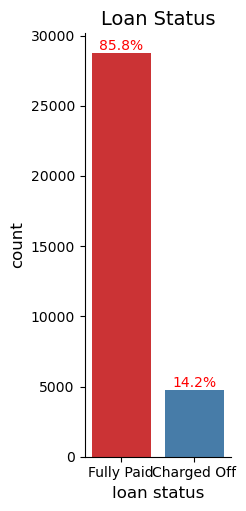

In [39]:
#let us see the distribution of loan status
plot=sns.catplot(x='loan_status',kind='count',data=loan,palette='Set1',aspect=.5);
plt.title('Loan Status', fontsize=14)
plt.xlabel('loan status',fontsize=12)
plt.ylabel('count', fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))),(p.get_x()+p.get_width()/2,p.get_height()),
            color='red',ha='center',va='bottom')
plt.show()    

The above graph shows that in the data provided there are around 14.2% applicants who have defaulted / charged off

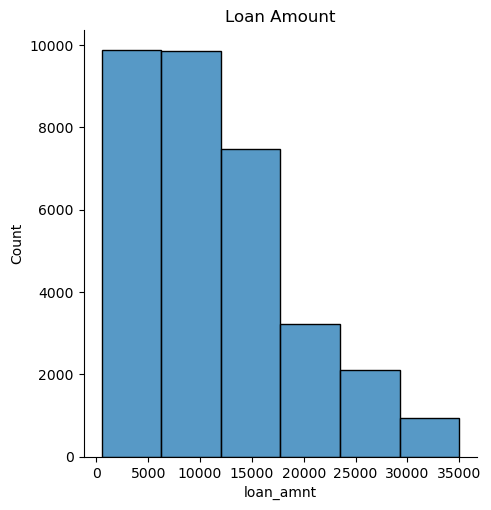

In [40]:
#let us see the distribution of loan amount

sns.displot(loan['loan_amnt'],bins=6)
plt.title('Loan Amount')
plt.show()

The graph above shows that the loan amount is majority spread around say 6000 to 18000 appx

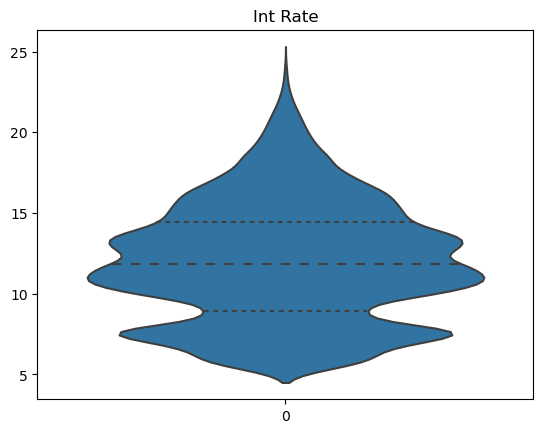

In [41]:
#let us see the distribution of interest rate
plt.title('Int Rate')
sns.violinplot(loan['int_rate'],inner='quartile')
plt.show()

The above graphs shows that the interest rate is spread majority betwwen 8% and 14% approx

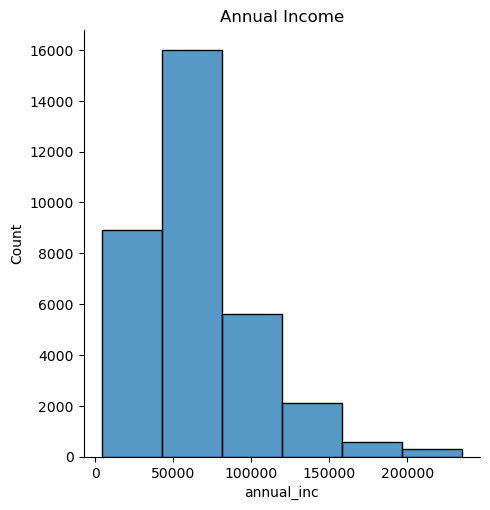

In [42]:
# let us see the distribution of Annual income

sns.displot(loan['annual_inc'], bins=6)
plt.title('Annual Income')
plt.show()

As per the above graph majority of the applicants have an annual income ranging apprx between 40000 USD to 90000 USD

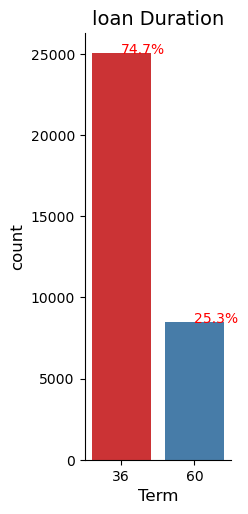

In [43]:
# let us analyse the loan duration
plot=sns.catplot(x='term', kind='count',data=loan, palette='Set1', aspect=.5);
plt.title('loan Duration',fontsize=14)
plt.xlabel('Term', fontsize=12)
plt.ylabel('count', fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), color='red')
plt.show()

As per the above graphs majority of the applicants have taken duration as 36 months (74.7%)

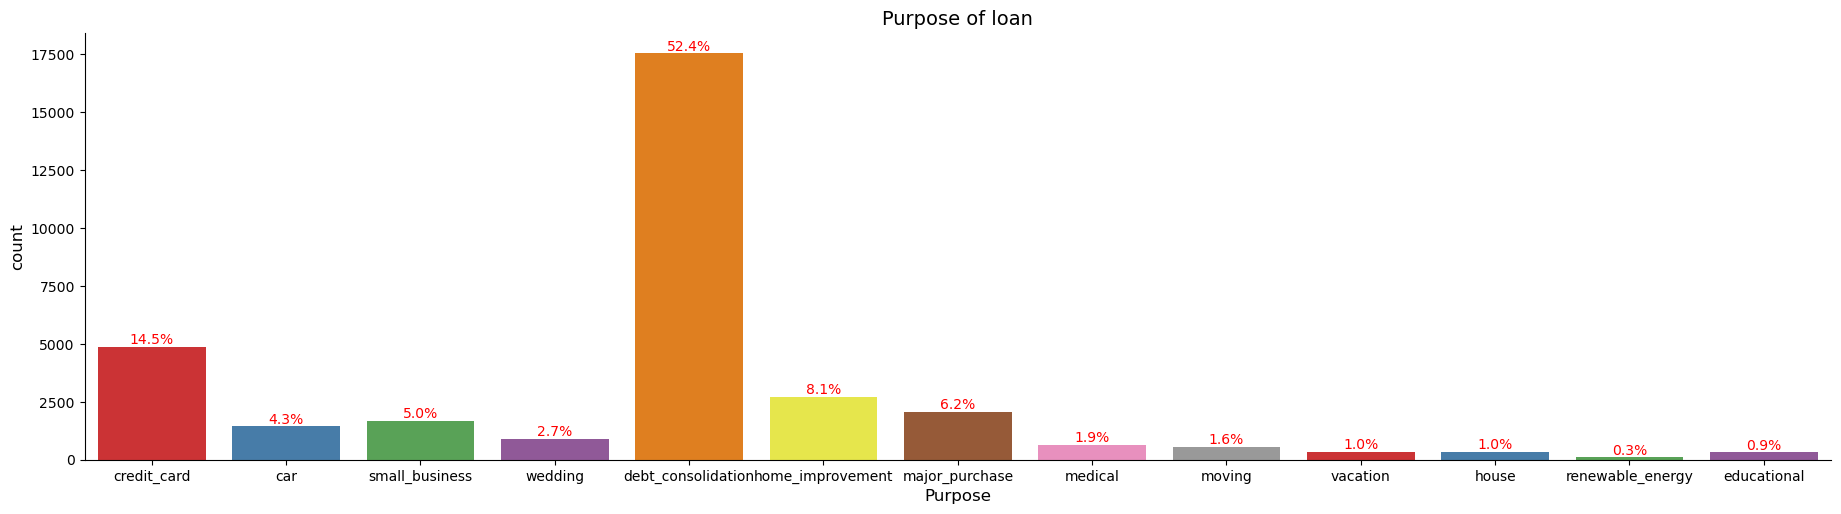

In [44]:
# let us see the purpose and its spread for which the applicants have applied for loan
plot=sns.catplot(x='purpose',kind='count',data=loan,palette='Set1',aspect=3.7);

plt.title('Purpose of loan', fontsize=14)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('count', fontsize=12)


ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()

The following are the purpose for which more than 5% applicants have been taken loan    

debt_consolidation - 52.4%

credit_card - 14.5%

home_improvemnet-8.1%

major_purchase-8.2%

small business-8.9%

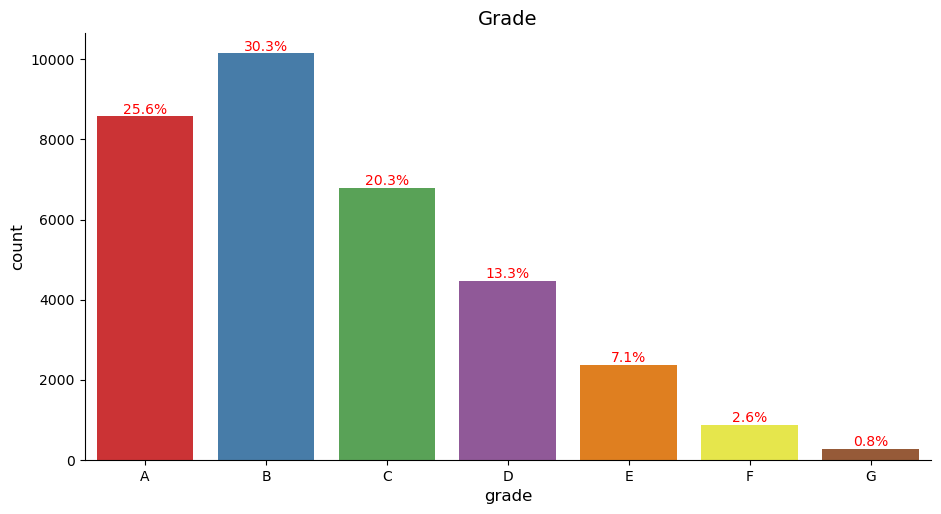

In [45]:
#let us see how the loan applicants is spread across the grade
order_grade=['A','B','C','D','E','F','G']
plot=sns.catplot(x='grade',kind='count',data=loan, palette='Set1',aspect=1.9,order=order_grade);

plt.title('Grade',fontsize=14)
plt.xlabel('grade',fontsize=12)
plt.ylabel('count', fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()

The above graphs shows that most of the applicants fall under the grade B 

## univariate analysis

In [46]:
# various order categories which world be frequently used for ordering
order_category=['Low','Medium','High','Very High']
order_emp_category=['Entry Level','Junior Level','Middle Level','Senior Level']
order_grade=['A','B','C','D','E','F','G']
filtered_purpose_df=loan[(loan['purpose']=='debt_conslidation')
                        |(loan['purpose']=='credit_card')
                        |(loan['purpose']=='home_improvement')
                        |(loan['purpose']=='major_purpose')
                        |(loan['purpose']=='small_business')]

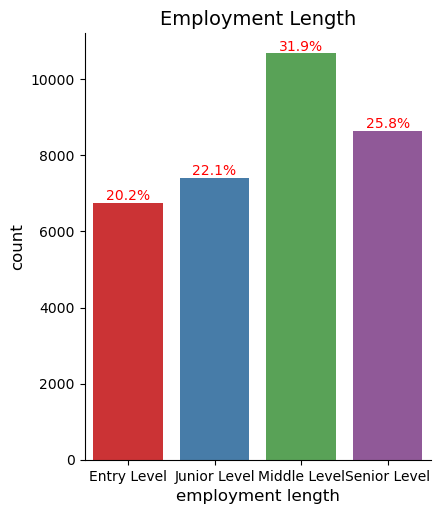

In [47]:
#employment length
plot=sns.catplot(x='categorised_emp_length', kind='count',data=loan, palette='Set1',aspect=0.9,order=order_emp_category);

plt.title('Employment Length', fontsize=14)
plt.xlabel('employment length',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')

There are more number of loan applicants beloging in the middle level category (31.9%) ie between 4 to 8 years

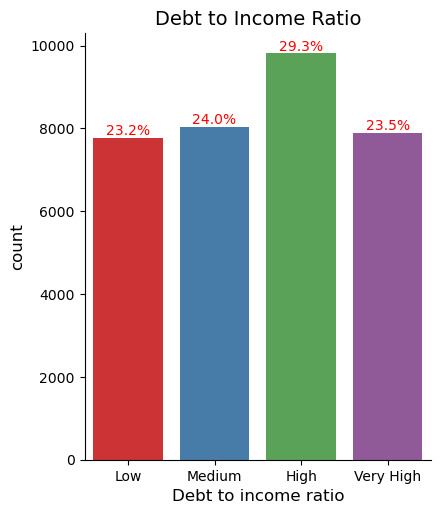

In [48]:

#Debt to income ratio
plot=sns.catplot(x='categorised_dti', kind='count',data=loan, palette='Set1',aspect=0.9,order=order_category);

plt.title('Debt to Income Ratio', fontsize=14)
plt.xlabel('Debt to income ratio',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

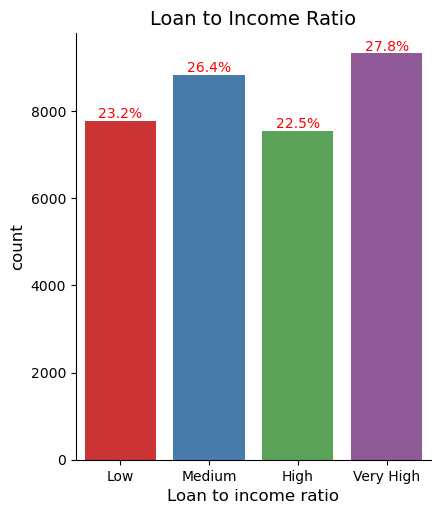

In [49]:
# based on loan to income ratio

plot=sns.catplot(x='categorised_loan_inc_ratio', kind='count',data=loan, palette='Set1',aspect=0.9,order=order_category);

plt.title('Loan to Income Ratio', fontsize=14)
plt.xlabel('Loan to income ratio',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

## Bivariate analysis

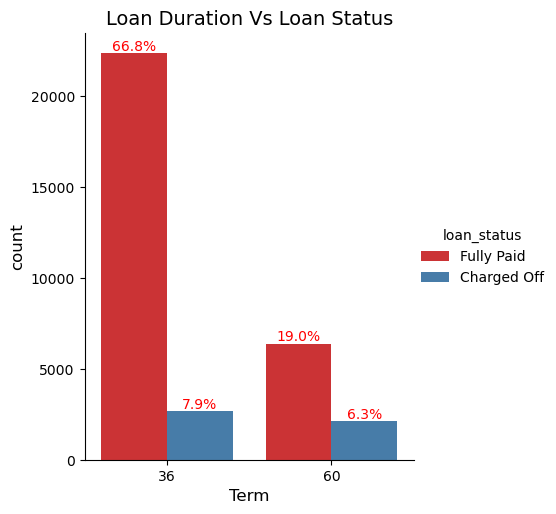

In [52]:
#Loan Duration Vs Loan Status

plot=sns.catplot(x='term',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=0.9);

plt.title('Loan Duration Vs Loan Status', fontsize=14)
plt.xlabel('Term',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

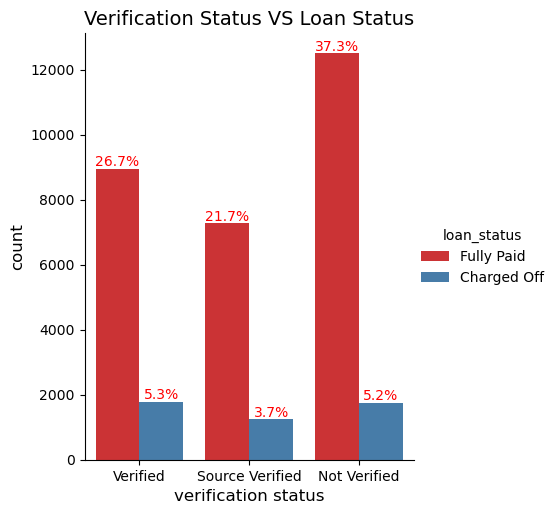

In [53]:
# Verification Status Vs Loan Status

plot=sns.catplot(x='verification_status',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=0.9);

plt.title('Verification Status VS Loan Status', fontsize=14)
plt.xlabel('verification status',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

Per the graph above, applicants whose income has been verified seem to default more, hence we can ignore this cause of default

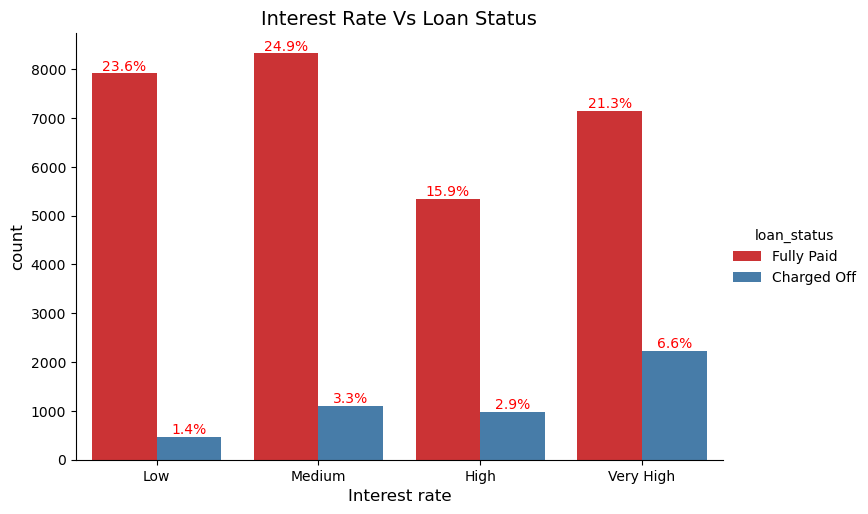

In [54]:
# Interest Rate Vs Loan Status

plot=sns.catplot(x='categorised_int_rate_perc',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=1.5, 
                 order=order_category);

plt.title('Interest Rate Vs Loan Status', fontsize=14)
plt.xlabel('Interest rate',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

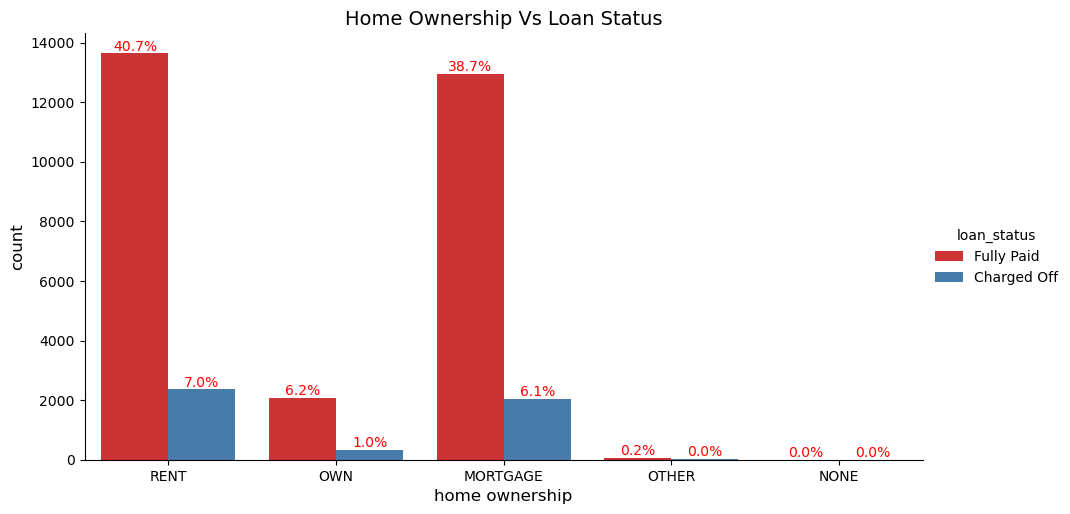

In [55]:
# Home Ownership Vs Loan Status

plot=sns.catplot(x='home_ownership',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=1.9);

plt.title('Home Ownership Vs Loan Status', fontsize=14)
plt.xlabel('home ownership',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    if np.isnan(p.get_height()):
        height=0
    else:
        height=p.get_height()
    height=int(height)    
    ax.annotate('{:1.1f}%'.format((height*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., height),
    color='red', ha='center', va='bottom')
plt.show()    

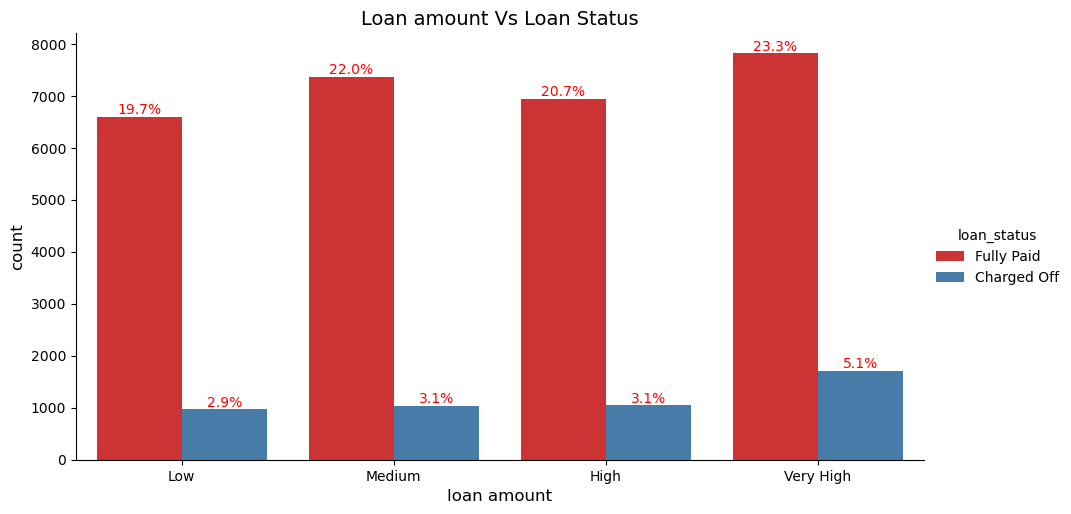

In [56]:
#Loan Amount Vs Loan Status

plot=sns.catplot(x='categorised_loan_amnt',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=1.9);

plt.title('Loan amount Vs Loan Status', fontsize=14)
plt.xlabel('loan amount',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    if np.isnan(p.get_height()):
        height=0
    else:
        height=p.get_height()
    height=int(height)    
    ax.annotate('{:1.1f}%'.format((height*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., height),
    color='red', ha='center', va='bottom')
plt.show()    

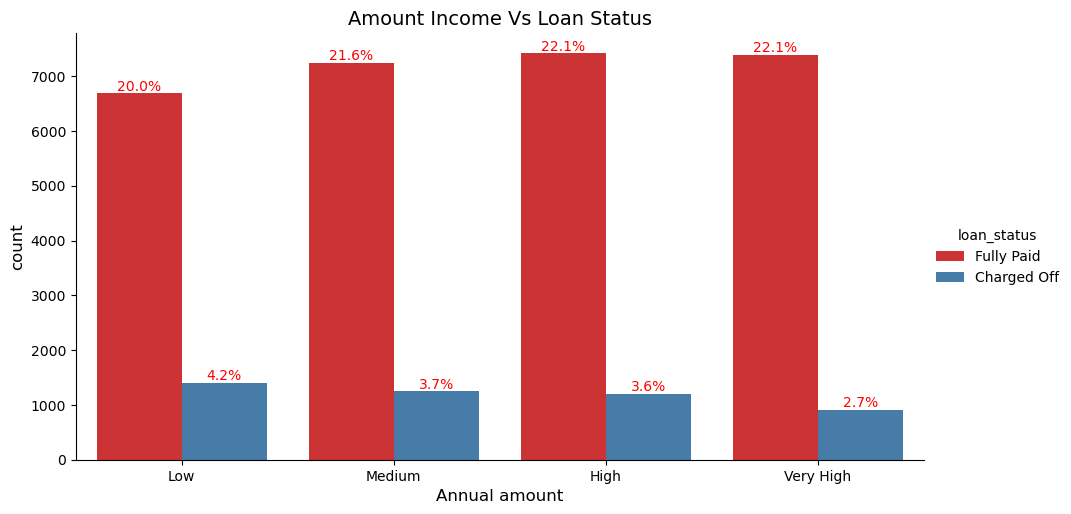

In [57]:
#Amount Income Vs Loan Status

plot=sns.catplot(x='categorised_annual_inc',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=1.9);

plt.title('Amount Income Vs Loan Status', fontsize=14)
plt.xlabel('Annual amount',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches:
    if np.isnan(p.get_height()):
        height=0
    else:
        height=p.get_height()
    height=int(height)    
    ax.annotate('{:1.1f}%'.format((height*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., height),
    color='red', ha='center', va='bottom')
plt.show()    

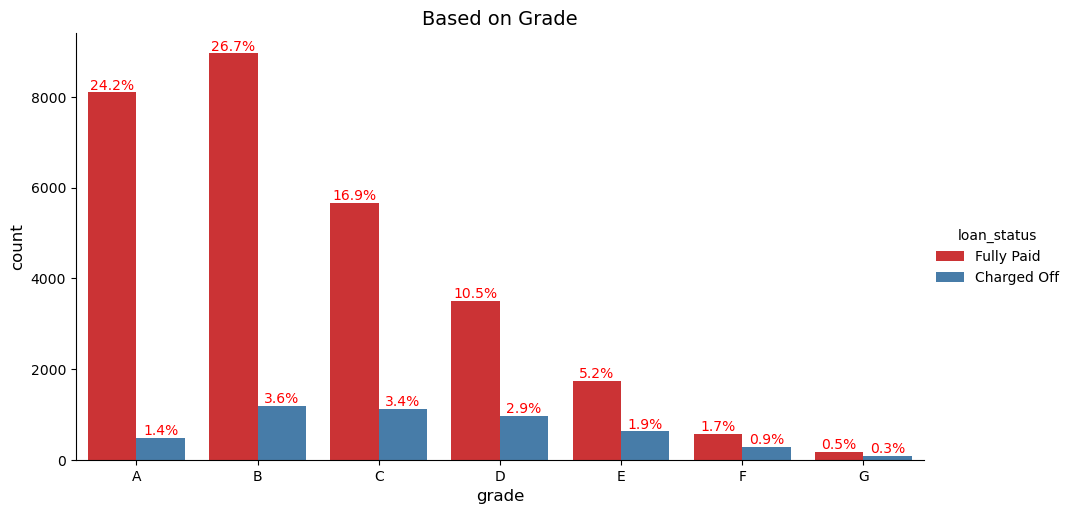

In [58]:
# Grade Vs Loan Status

plot=sns.catplot(x='grade',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=1.9, order=order_grade);

plt.title('Based on Grade', fontsize=14)
plt.xlabel('grade',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches: 
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

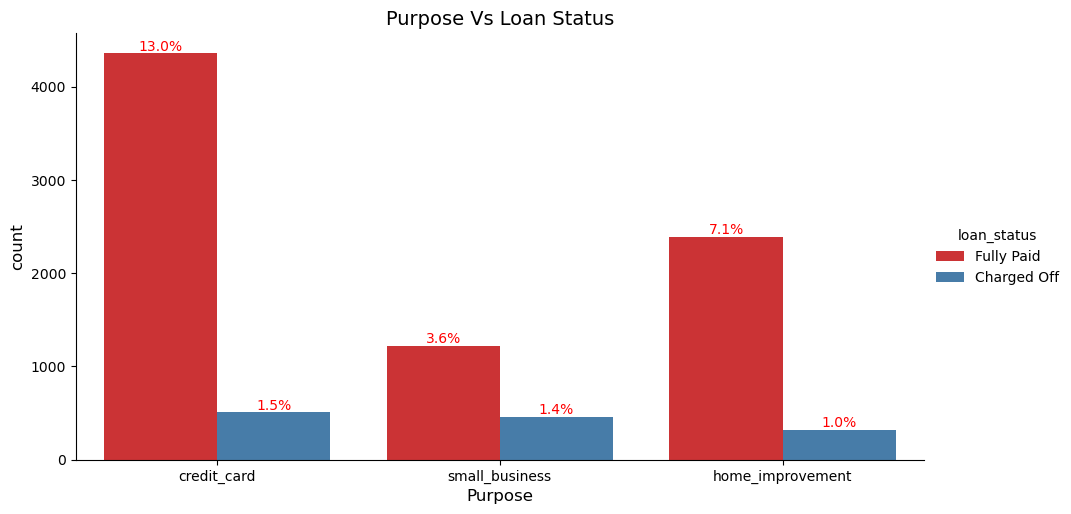

In [59]:
#Purpose Vs Loan Status

plot=sns.catplot(x='purpose',hue='loan_status', kind='count',data=filtered_purpose_df, palette='Set1',aspect=1.9);

plt.title('Purpose Vs Loan Status', fontsize=14)
plt.xlabel('Purpose',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches: 
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

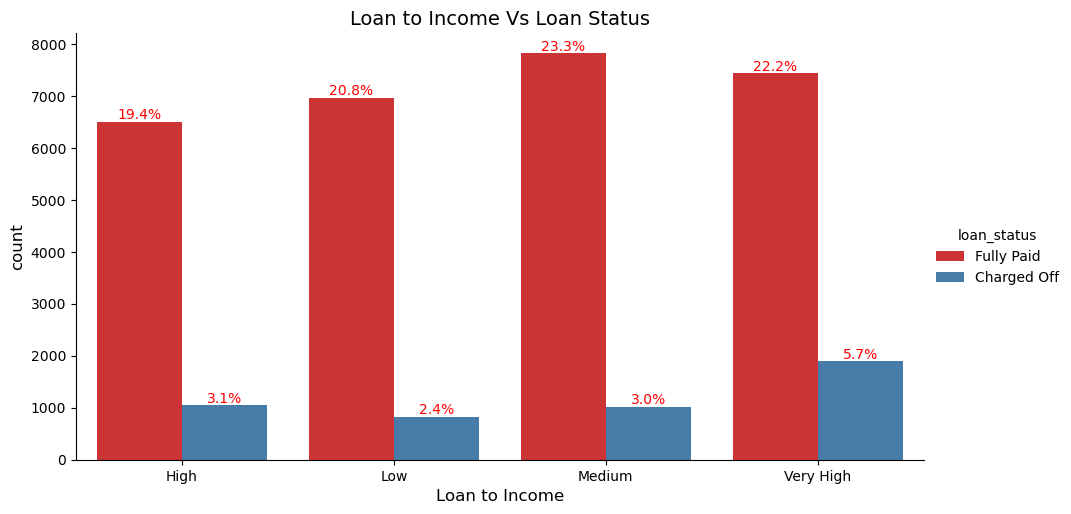

In [60]:
# Loan to Income Vs Loan Status

plot=sns.catplot(x='categorised_loan_inc_ratio',hue='loan_status', kind='count',data=loan, palette='Set1',aspect=1.9);

plt.title('Loan to Income Vs Loan Status', fontsize=14)
plt.xlabel('Loan to Income',fontsize=12)
plt.ylabel('count',fontsize=12)

ax=plot.facet_axis(0,0)
for p in ax.patches: 
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+ p.get_width()/2., p.get_height()),
    color='red', ha='center', va='bottom')
plt.show()    

## Analysis based on more than 2 columns

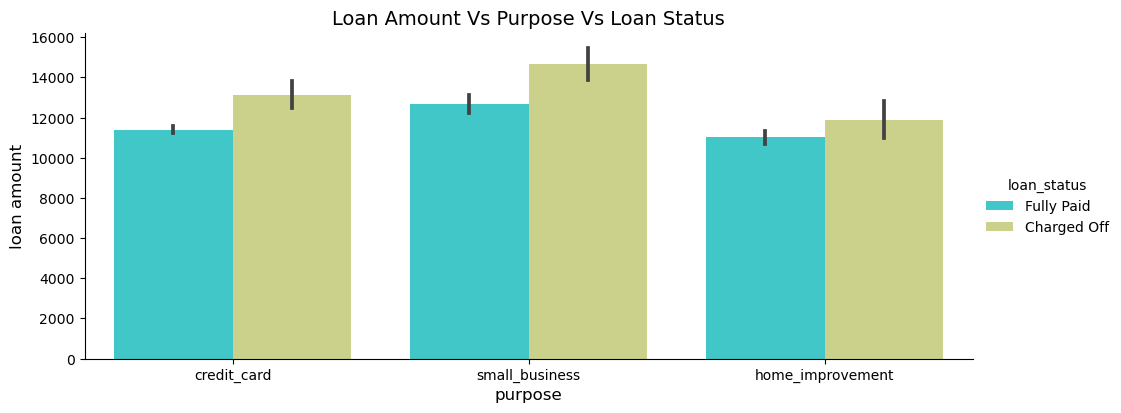

In [61]:
#Loan status Vs Purpose Vs Loan Amount

plot=sns.catplot(x='purpose',y='loan_amnt',hue='loan_status', kind='bar',data=filtered_purpose_df, palette='rainbow',height=4 ,aspect=2.5);

plt.title('Loan Amount Vs Purpose Vs Loan Status', fontsize=14)
plt.xlabel('purpose',fontsize=12)
plt.ylabel('loan amount',fontsize=12)

plt.show()    

In [62]:
#Annual Income Vs Loan Amount Vs Purpose for Charged off loan status
charged_off_filtered_purpose_df=filtered_purpose_df[(filtered_purpose_df['loan_status']=='Charged Off')]



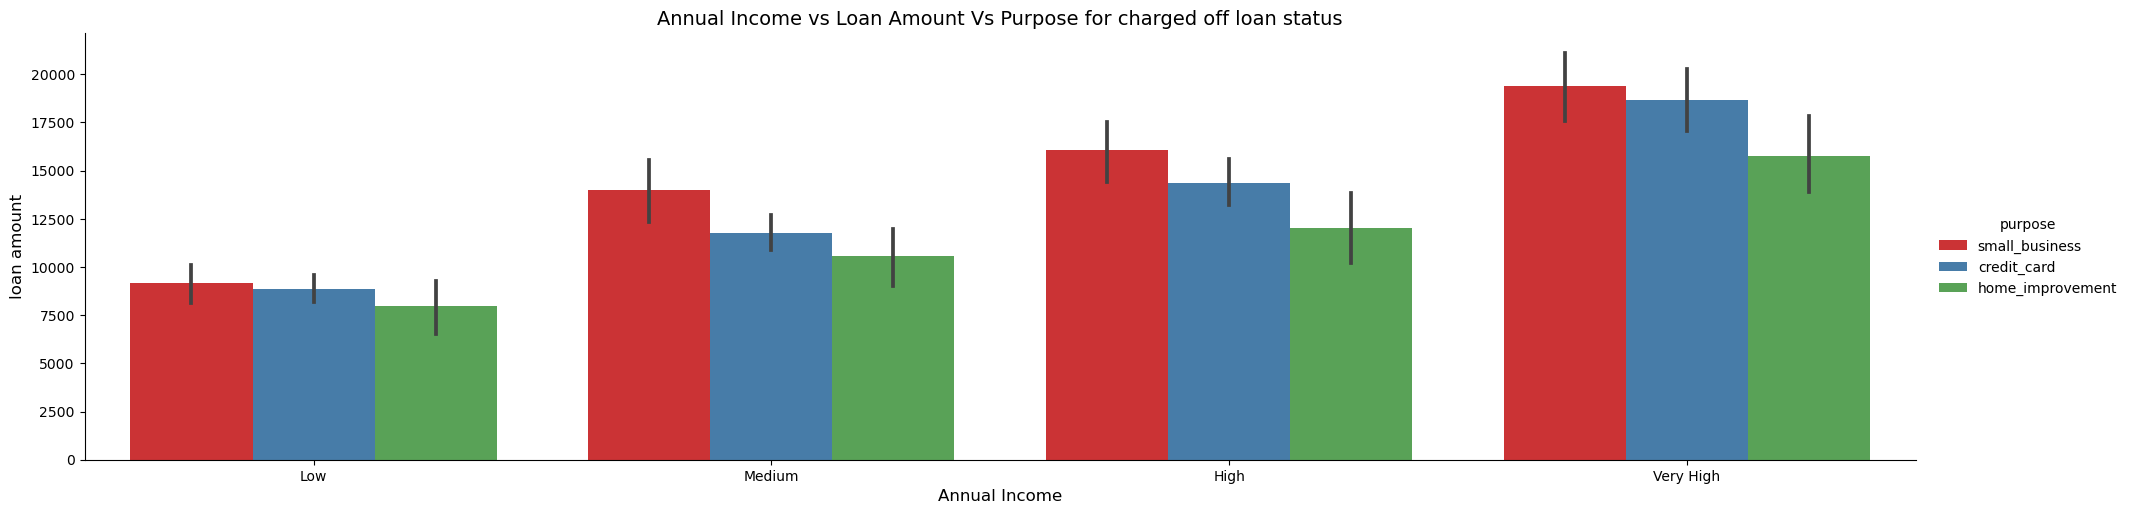

In [63]:
plot=sns.catplot(x='categorised_annual_inc',y='loan_amnt',hue='purpose', kind='bar',data=charged_off_filtered_purpose_df,
                 palette='Set1',aspect=3.9, order=order_category);

plt.title('Annual Income vs Loan Amount Vs Purpose for charged off loan status', fontsize=14)
plt.xlabel('Annual Income',fontsize=12)
plt.ylabel('loan amount',fontsize=12)

plt.show()

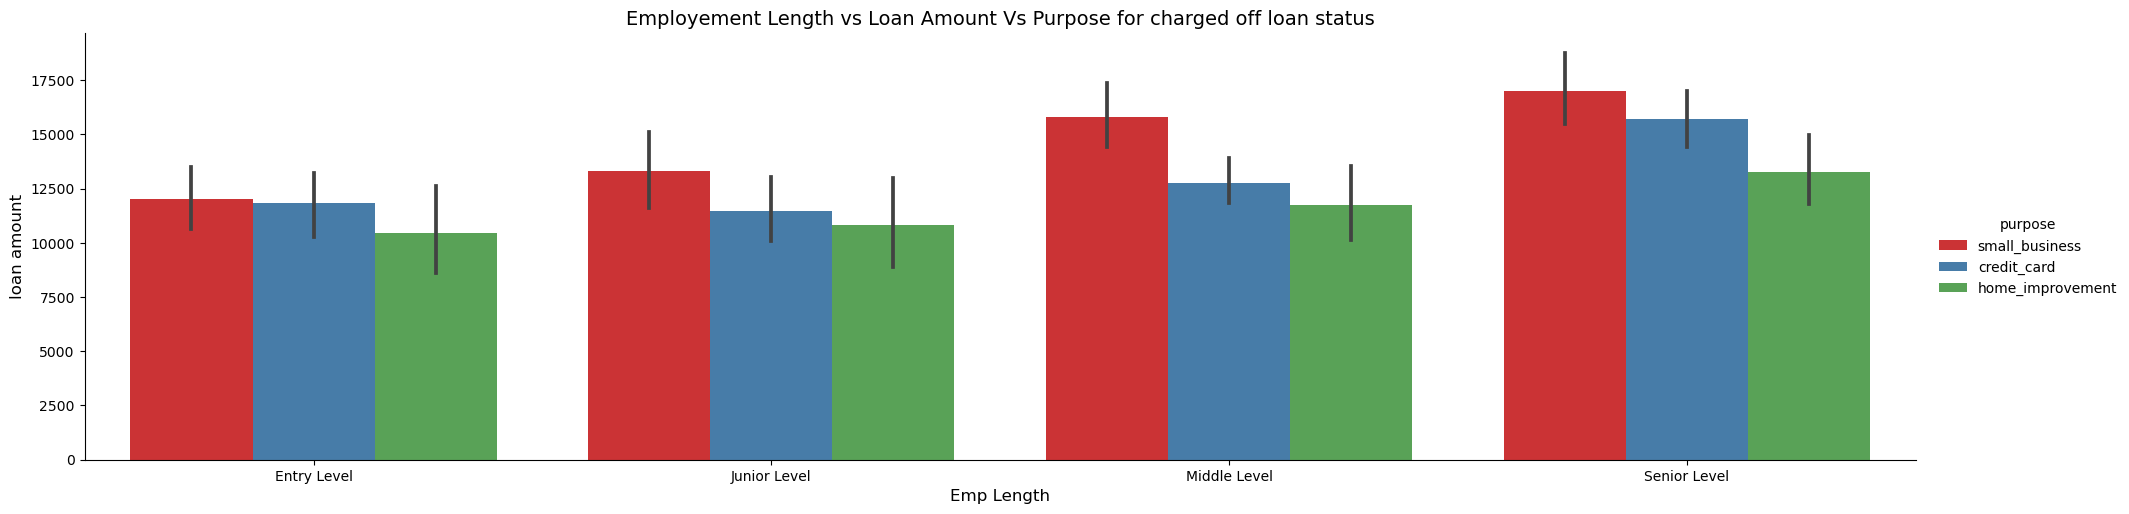

In [64]:
#Employment Length Vs Loan Amount VS Purpose for charged off Loan status
plot=sns.catplot(x='categorised_emp_length',y='loan_amnt',hue='purpose', kind='bar',data=charged_off_filtered_purpose_df,
                 palette='Set1',aspect=3.9, order=order_emp_category);

plt.title('Employement Length vs Loan Amount Vs Purpose for charged off loan status', fontsize=14)
plt.xlabel('Emp Length',fontsize=12)
plt.ylabel('loan amount',fontsize=12)

plt.show()

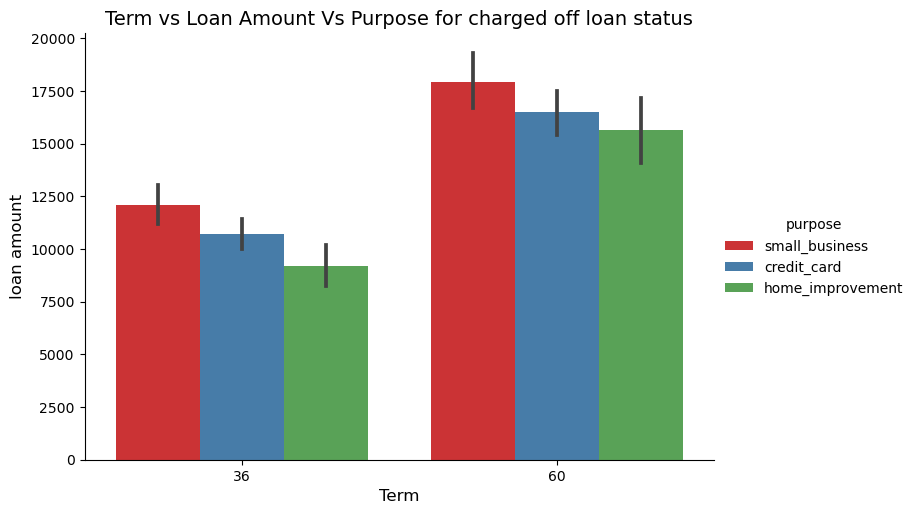

In [65]:
#Terms Vs Loan Amount Vs Purpose for chrged off Loan Status
plot=sns.catplot(x='term',y='loan_amnt',hue='purpose', kind='bar',data=charged_off_filtered_purpose_df,
                 palette='Set1',aspect=1.5);

plt.title('Term vs Loan Amount Vs Purpose for charged off loan status', fontsize=14)
plt.xlabel('Term',fontsize=12)
plt.ylabel('loan amount',fontsize=12)

plt.show()

In [66]:
# function to change the width of bar plot
def change_width(ax, new_value):
    for patch in ax.patches:
        current_width=patch.get_width()
        diff=current_width- new_value
        
        patch.set_width(new_value)
        patch.set_x(patch.get_x()+diff*.5)
        
def plot_map(crosstab, partialTitle, label_name, value):
    linePlot=crosstab[['percentage_defaulted']]
    barPlot=crosstab[['Charged Off', 'Fully Paid']]
    
    ax=linePlot.plot(figsize=(20,0), marker='o', color='b')
    ax2=barPlot.plot(kind='bar', ax=ax, rot=1, secondary_y=True, stacked=True, figsize=(15,5))
    
    ax.set_title(partialTitle +'Vs Percentage Default' , fontsize=14 )
    ax.set_xlabel(label_name, fontsize=14)
    ax.set_ylabel('percentage of Default', color='b', fontsize=13)
    ax2.set_ylabel('number of applicants', color='r', fontsize=13)
    
    change_width(ax2, value)
    plt.show()

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
addr_state,,,,
AL,46,338,384,11.98
AR,21,187,208,10.10
AZ,99,616,715,13.85
CA,951,5103,6054,15.71
CO,80,600,680,11.76
CT,82,550,632,12.97
DC,13,184,197,6.60
FL,433,1958,2391,18.11
GA,179,1003,1182,15.14


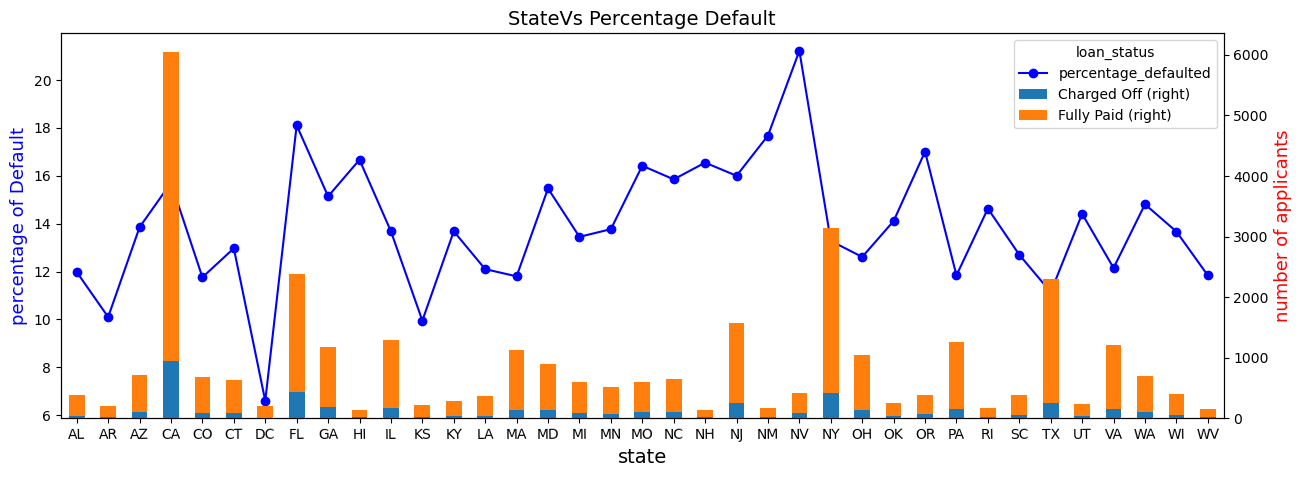

In [67]:
#percentage of default rate in various status
filter_states=loan.addr_state.value_counts()
filter_states=filter_states[(filter_states<109)]
filter_states_df=loan.drop(labels=loan[loan.addr_state.isin(filter_states.index)].index)

filter_states_crosstab=pd.crosstab(filter_states_df['addr_state'], filter_states_df['loan_status'], margins=True)
filter_states_crosstab.drop(filter_states_crosstab.tail(1).index, inplace=True)
filter_states_crosstab['percentage_defaulted']=round(100*((filter_states_crosstab['Charged Off']/filter_states_crosstab['All'])),2)
display(filter_states_crosstab)
plot_map(filter_states_crosstab, 'State','state',.50)

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
categorised_int_rate_perc,,,,
High,975,5339,6314,15.44
Low,465,7917,8382,5.55
Medium,1106,8324,9430,11.73
Very High,2222,7144,9366,23.72


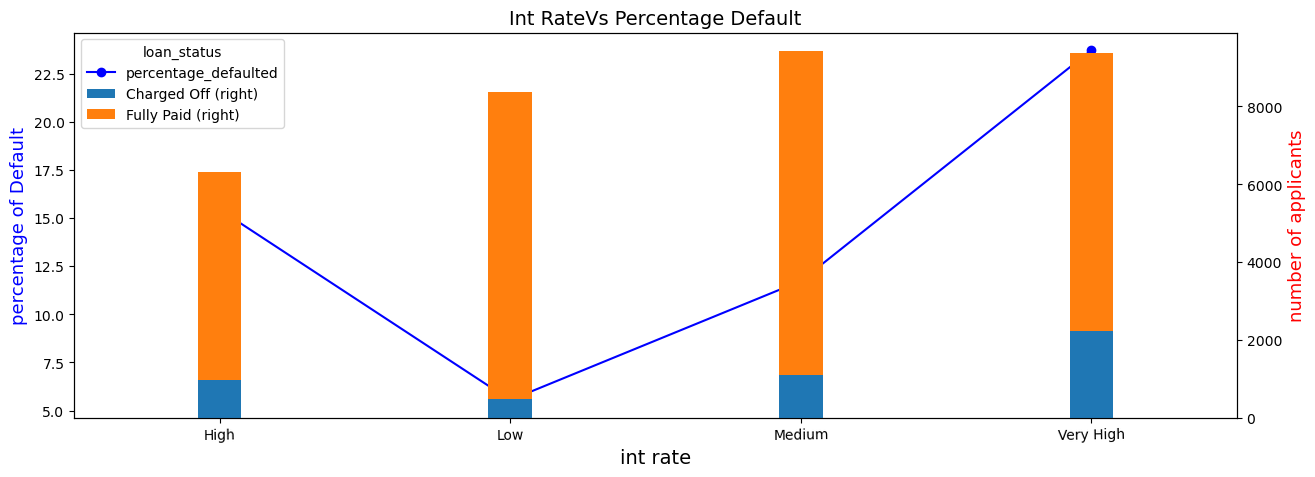

In [68]:
# Percentage default for int_rate

int_rate_loan_df=loan
int_rate_loan_df.categorised_int_rate_perc=int_rate_loan_df.categorised_int_rate_perc.astype('category')
int_rate_loan_df.categorised_int_rate_perc.cat.set_categories(order_category)
int_rate_loan_df.sort_values(['categorised_int_rate_perc'])

int_rate_crosstab=pd.crosstab(int_rate_loan_df['categorised_int_rate_perc'],int_rate_loan_df['loan_status'], margins=True)
int_rate_crosstab.drop(int_rate_crosstab.tail(1).index, inplace=True)
int_rate_crosstab['percentage_defaulted']=round(100*((int_rate_crosstab['Charged Off']/int_rate_crosstab['All'])),2)
display(int_rate_crosstab)

plot_map(int_rate_crosstab, 'Int Rate','int rate', .15)

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
purpose,,,,
credit_card,506,4356,4862,10.41
debt_consolidation,2665,14875,17540,15.19
home_improvement,321,2386,2707,11.86
major_purchase,209,1851,2060,10.15
small_business,459,1222,1681,27.31


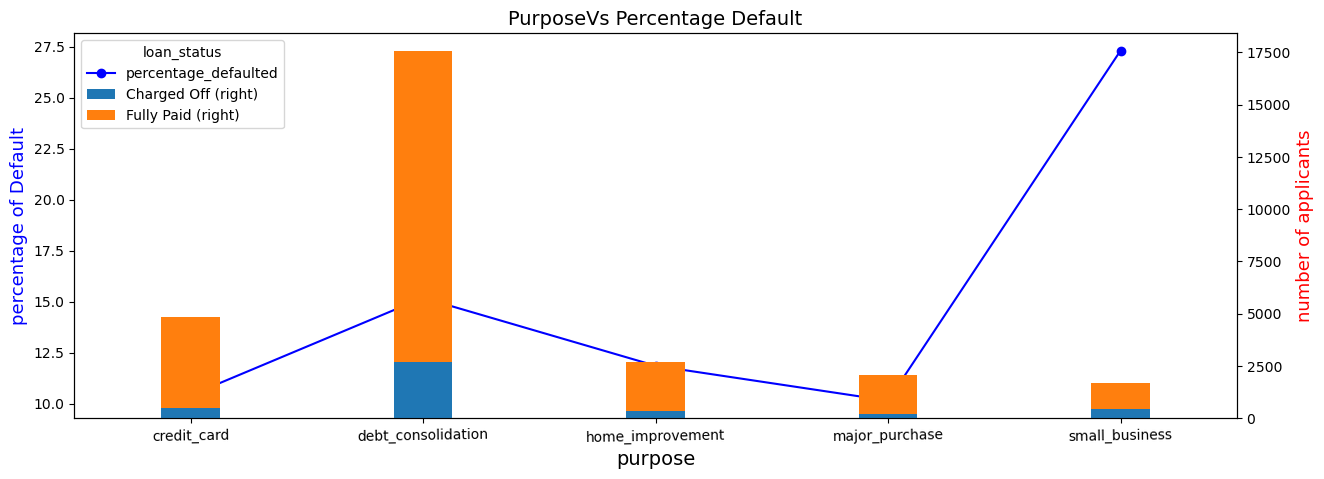

In [69]:
#percentage default for purpose
purpose_loan_df=loan[(loan['purpose']=='debt_consolidation')
                    |(loan['purpose']=='credit_card')
                    |(loan['purpose']=='home_improvement')
                    |(loan['purpose']=='major_purchase')
                    |(loan['purpose']=='small_business')]

purposecrosstab=pd.crosstab(purpose_loan_df['purpose'],purpose_loan_df['loan_status'],margins=True)
purposecrosstab.drop(purposecrosstab.tail(1).index, inplace=True)
purposecrosstab['percentage_defaulted']=round(100*((purposecrosstab['Charged Off']/purposecrosstab['All'])),2)
display(purposecrosstab)

plot_map(purposecrosstab, 'Purpose','purpose',.25)

# Analysis Conclusion

1. Following are the main parameters, taken into consideration for arriving at the analysis conclusion

    -Interest Rate
    
    -Purpose
    
    -Grade
    
    -Term
    
    -Emp Length
    
    -Annual Income
    
    
    
2. as per the analysis, it can be inferred that applicants who are of low income group and have taken a high interest loan with longer duration for small business have more probability of defaulting.
    Hence extra care should be taken befor lending them loans.